## Q-01
a) DBNs have directed connections between layers, creating a hierarchical structure. DBMs, on the other hand, have undirected connections between all layers, forming a more complex and symmetric structure.

b) Learning DBM is intractable, so they do the following: 
-   **Simplifying to Restricted Boltzmann Machines (RBMs):** Initially, the model focuses on training RBMs, which have simpler architectures without connections within layers.
-  **Markov Chain Monte Carlo (MCMC) Sampling:** MCMC methods are used to approximate the intractable distribution, allowing for efficient learning and parameter updates.   
-   **Greedy Layer-wise Training:** The model is trained layer by layer, starting from the bottom RBM. This approach provides a good initialization and facilitates faster top-down inference.

## Q-02
a) DTSVM combines decision trees and SVMs by hierarchically applying linear SVMs to split data into subclusters until a minimum sample threshold is reached. Each sample is encoded as a vector where the *i*-th index is 1 if correctly classified, $-1$ if misclassified, and 0 if not involved in the i-th SVM. A final linear SVM is applied to the encoded data for classification. This approach captures hierarchical structure and combines it with SVM's classification strength.

Traditional SVM is a single step process, however DTSVM is a multistep (non-linear) hierarchically.

b) In the paper, each recursive partition evaluates how well the decision boundary performs locally for a sample in a particular SVM. This information is captured in the data encoding. The final SVM leverages this embedding to construct a universal boundary that represents the union of these *locally optimal* boundaries for each sample.

## Q-03
a) Traditional Hopfield networks can store a maximum of $ K^{max} = 0.14N $ patterns, which can be improved to $ K^{max} = N$. By modifying the standard energy function, Dense Associative Memories (DAM) further increase the storage capacity to $ K^{max} = \alpha_n N^{n-1} $, where $ \alpha_n $ is a constant, and $ N $ is the number of binary neurons in the associative memory model.

b) As $ n $ increases, the storage capacity grows non-linearly with $ N $, allowing the network to store and reliably retrieve significantly more patterns than the number of neurons it contains.

# Q4

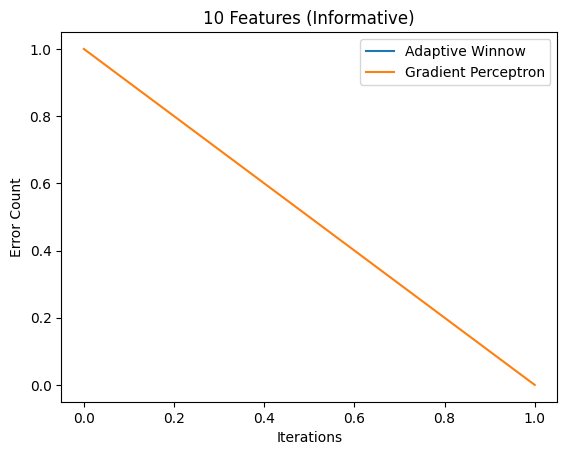

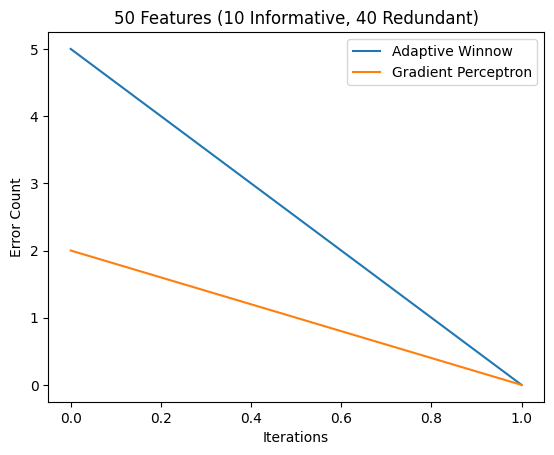

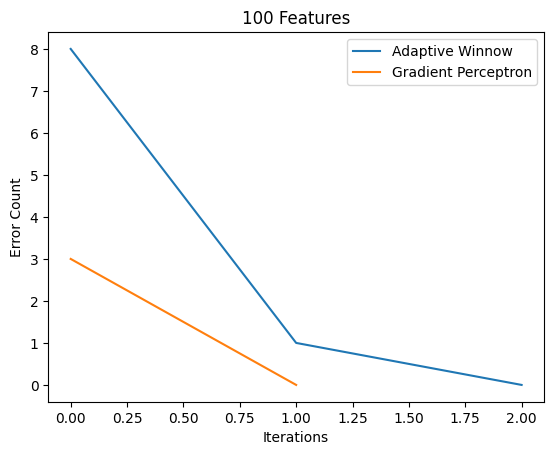

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation function for training
def create_training_data(num_samples=2000, num_features=100, num_informative=10):
    features = np.random.uniform(-2, 2, size=(num_samples, num_features))
    targets = np.zeros(num_samples)

    # Assign values to informative features
    for idx in range(num_samples // 2):
        features[idx, :num_informative] = np.random.uniform(1, 2, size=num_informative)
        targets[idx] = 1  # Class ω1

    for idx in range(num_samples // 2, num_samples):
        features[idx, :num_informative] = np.random.uniform(-2, -1, size=num_informative)
        targets[idx] = -1  # Class ω2

    return features, targets

# Function to calculate a separating hyperplane
def compute_hyperplane(features):
    return np.sum(features[:10])

# Adaptive Winnow algorithm implementation
def adaptive_winnow(X, Y, increase_factor=1.1, decrease_factor=0.9, max_iterations=1000):
    num_samples, num_features = X.shape
    weight_vector = np.ones(num_features)
    iteration_errors = []

    for _ in range(max_iterations):
        total_errors = 0
        for sample, label in zip(X, Y):
            prediction = np.sign(np.dot(weight_vector, sample))
            if prediction != label:
                total_errors += 1
                # Update weights
                for i in range(num_features):
                    if label * sample[i] > 0:
                        weight_vector[i] *= increase_factor
                    else:
                        weight_vector[i] *= decrease_factor
        iteration_errors.append(total_errors)
        if total_errors == 0:
            break

    return weight_vector, iteration_errors

# Gradient-based Perceptron implementation
def gradient_perceptron(X, Y, lr=0.01, max_iterations=1000):
    num_samples, num_features = X.shape
    weight_vector = np.zeros(num_features)
    iteration_errors = []

    for _ in range(max_iterations):
        misclassified = 0
        for sample, label in zip(X, Y):
            if label * np.dot(weight_vector, sample) <= 0:
                misclassified += 1
                weight_vector += lr * label * sample
        iteration_errors.append(misclassified)
        if misclassified == 0:
            break

    return weight_vector, iteration_errors

# Plotting error rates
def visualize_error_rates(errors_winnow, errors_perceptron, plot_title):
    plt.plot(errors_winnow, label="Adaptive Winnow")
    plt.plot(errors_perceptron, label="Gradient Perceptron")
    plt.title(plot_title)
    plt.xlabel("Iterations")
    plt.ylabel("Error Count")
    plt.legend()
    plt.show()

# Main driver script
features_full, targets = create_training_data(num_samples=2000, num_features=100)
features_reduced_50 = features_full[:, :50]
features_reduced_10 = features_full[:, :10]

# Train and compare algorithms on datasets with varying feature sizes
for dataset, plot_title in zip([features_reduced_10, features_reduced_50, features_full], 
                               ["10 Features (Informative)", 
                                "50 Features (10 Informative, 40 Redundant)", 
                                "100 Features"]):
    winnow_weights, winnow_errors = adaptive_winnow(dataset, targets)
    perceptron_weights, perceptron_errors = gradient_perceptron(dataset, targets)
    visualize_error_rates(winnow_errors, perceptron_errors, plot_title)



**Conclusion:** The solution to this is the hyperplane:  $\sum\limits_{i=1}^{N} x_i=0$ where $N=10$

# Q5

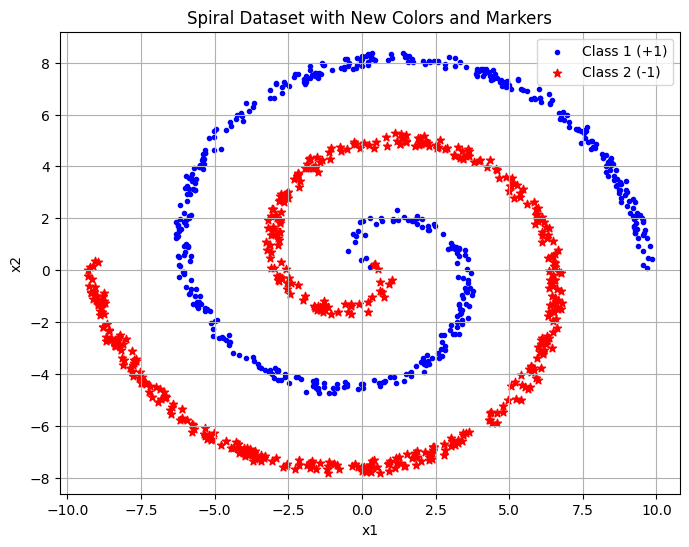

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./spiral_dataset.csv')
data = df[['x1', 'x2']].values
labels = df['y'].values

# Separate classes
class_1 = data[labels == 1]
class_2 = data[labels == -1]

# Plot the two classes with different colors and markers
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='.', label='Class 1 (+1)')
plt.scatter(class_2[:, 0], class_2[:, 1], c='red', marker='*', label='Class 2 (-1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Spiral Dataset with New Colors and Markers')
plt.legend()
plt.grid(True)
plt.show()


### Training with linear, RBF, polynomial and sigmoid kernel


Training SVM with linear kernel...
Accuracy with linear kernel: 0.6600
              precision    recall  f1-score   support

        -1.0       0.67      0.62      0.65       150
         1.0       0.65      0.70      0.67       150

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.66      0.66      0.66       300


Training SVM with poly kernel...
Accuracy with poly kernel: 0.6533
              precision    recall  f1-score   support

        -1.0       0.64      0.69      0.67       150
         1.0       0.67      0.61      0.64       150

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300


Training SVM with rbf kernel...
Accuracy with rbf kernel: 0.9100
              precision    recall  f1-score   support

        -1.0       0.92      0.90      0.91       150
         1.0       0.90      0.

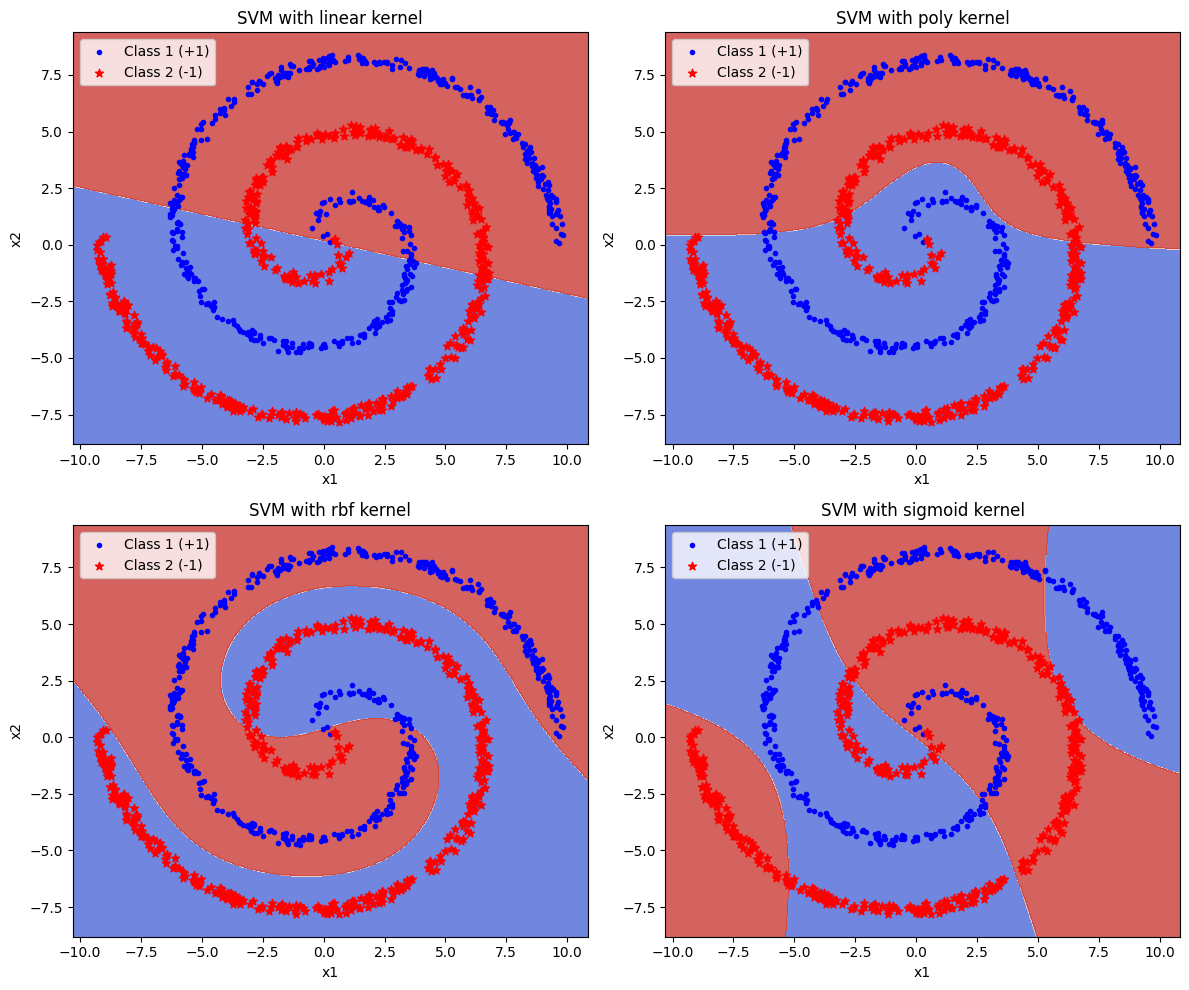

In [11]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Define kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and evaluate an SVM for each kernel
models = {}
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    models[kernel] = svm

    # Evaluate on the test set
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Precomputed Kernel (requires Gram matrix)
print("\nTraining SVM with precomputed kernel...")
# Compute the Gram matrix
gram_matrix_train = np.dot(X_train, X_train.T)
gram_matrix_test = np.dot(X_test, X_train.T)

# Train and test the SVM with precomputed kernel
svm_precomputed = SVC(kernel='precomputed')
svm_precomputed.fit(gram_matrix_train, y_train)
y_pred_precomputed = svm_precomputed.predict(gram_matrix_test)
acc_precomputed = accuracy_score(y_test, y_pred_precomputed)
print(f"Accuracy with precomputed kernel: {acc_precomputed:.4f}")
print(classification_report(y_test, y_pred_precomputed))

# Visualization for linear, poly, rbf, sigmoid kernels
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    ax = axes[i]
    model = models[kernel]
    
    # Create a grid for decision boundary visualization
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='.', label='Class 1 (+1)')
    ax.scatter(class_2[:, 0], class_2[:, 1], c='red', marker='*', label='Class 2 (-1)')
    ax.set_title(f"SVM with {kernel} kernel")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

plt.tight_layout()
plt.show()


The spiral dataset is highly non-linear and intertwined, requiring a flexible decision boundary.
- Reason of success or failures: The **linear kernel** fails as it can only model straight lines.  
- The **polynomial kernel** struggles with the spiral's complexity and risks overfitting or underfitting. 
- The **sigmoid kernel** lacks the capacity to handle intricate patterns. 
- The **RBF kernel** excels because it maps data into a higher-dimensional space, allowing it to adapt to the spiral's non-linear structure effectively.

### A dataset that most kernel fails [Chessboard pattern distribtuion]

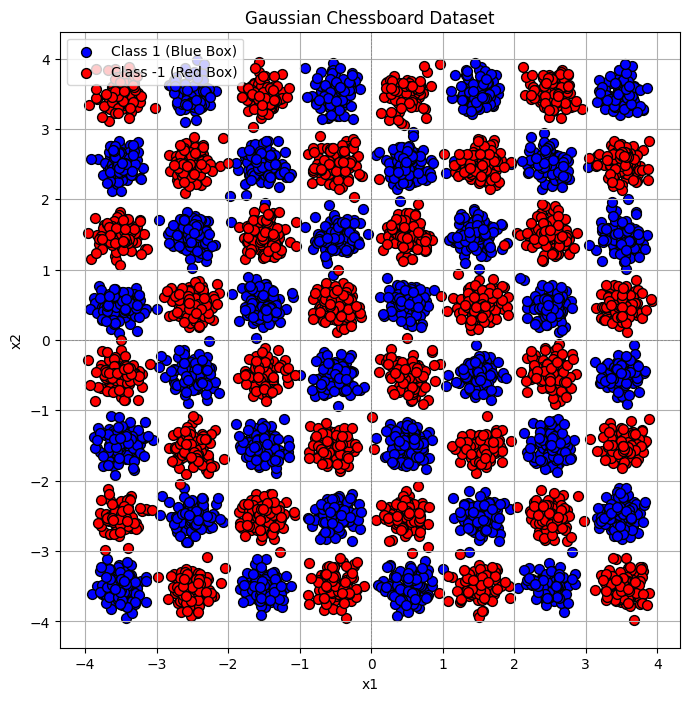

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_chessboard(n_samples_per_box=50, n_boxes_per_axis=4, box_size=1, noise=0.1):
    """
    Generate a chessboard-like dataset with Gaussian-distributed points within each box.

    Args:
        n_samples_per_box (int): Number of points to generate per box.
        n_boxes_per_axis (int): Number of boxes along each axis (must be even for alternation).
        box_size (float): Size of each box.
        noise (float): Standard deviation of Gaussian noise within each box.

    Returns:
        data (ndarray): Generated 2D points of shape (n_samples, 2).
        labels (ndarray): Class labels (-1 or 1) for the points.
    """
    data = []
    labels = []

    # Calculate the grid boundaries
    grid_min = -n_boxes_per_axis / 2 * box_size
    grid_max = n_boxes_per_axis / 2 * box_size
    
    # Iterate over the chessboard grid
    for i in range(n_boxes_per_axis):
        for j in range(n_boxes_per_axis):
            # Calculate the center of the current box
            center_x = grid_min + (i + 0.5) * box_size
            center_y = grid_min + (j + 0.5) * box_size
            
            # Generate points centered around this box's center
            points = np.random.normal(loc=[center_x, center_y], scale=noise, size=(n_samples_per_box, 2))
            data.append(points)
            
            # Assign label based on (i + j) parity
            label = 1 if (i + j) % 2 == 0 else -1
            labels.extend([label] * n_samples_per_box)
    
    return np.vstack(data), np.array(labels)

# Generate the Gaussian chessboard dataset
data, labels = generate_gaussian_chessboard(n_samples_per_box=100, n_boxes_per_axis=8, box_size=1, noise=0.16)

# Visualize the Gaussian chessboard dataset
plt.figure(figsize=(8, 8))
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='blue', edgecolors='k', label='Class 1 (Blue Box)', s=50)
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], c='red', edgecolors='k', label='Class -1 (Red Box)', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gaussian Chessboard Dataset')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


Training SVM with linear kernel...
Accuracy with linear kernel: 0.4828
              precision    recall  f1-score   support

          -1       0.49      0.46      0.48       971
           1       0.48      0.50      0.49       949

    accuracy                           0.48      1920
   macro avg       0.48      0.48      0.48      1920
weighted avg       0.48      0.48      0.48      1920


Training SVM with poly kernel...
Accuracy with poly kernel: 0.5021
              precision    recall  f1-score   support

          -1       0.51      0.41      0.45       971
           1       0.50      0.60      0.54       949

    accuracy                           0.50      1920
   macro avg       0.50      0.50      0.50      1920
weighted avg       0.50      0.50      0.50      1920


Training SVM with rbf kernel...
Accuracy with rbf kernel: 0.4833
              precision    recall  f1-score   support

          -1       0.48      0.32      0.38       971
           1       0.48      0.

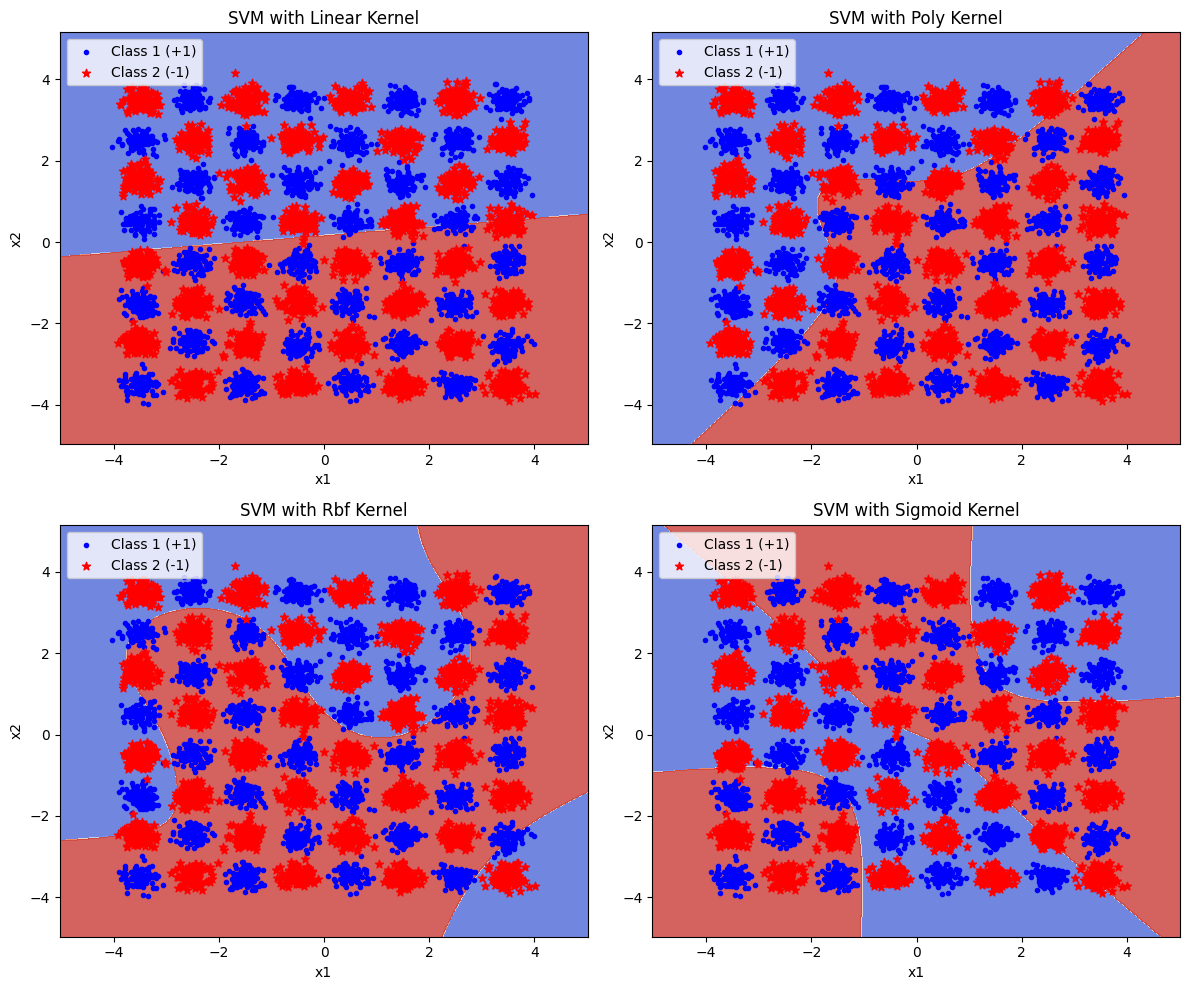

In [25]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define a Gaussian Chessboard Dataset generator
def generate_gaussian_chessboard(n_samples_per_box=50, n_boxes_per_axis=4, box_size=1, noise=0.1):
    data = []
    labels = []
    grid_min = -n_boxes_per_axis / 2 * box_size
    
    for i in range(n_boxes_per_axis):
        for j in range(n_boxes_per_axis):
            center_x = grid_min + (i + 0.5) * box_size
            center_y = grid_min + (j + 0.5) * box_size
            points = np.random.normal(loc=[center_x, center_y], scale=noise, size=(n_samples_per_box, 2))
            data.append(points)
            label = 1 if (i + j) % 2 == 0 else -1
            labels.extend([label] * n_samples_per_box)
    return np.vstack(data), np.array(labels)

# Generate dataset
data, labels = generate_gaussian_chessboard(n_samples_per_box=100, n_boxes_per_axis=8, box_size=1, noise=0.16)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Define kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and evaluate SVM for each kernel
models = {}
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    models[kernel] = svm
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Precomputed Kernel
gram_matrix_train = np.dot(X_train, X_train.T)
gram_matrix_test = np.dot(X_test, X_train.T)
svm_precomputed = SVC(kernel='precomputed')
svm_precomputed.fit(gram_matrix_train, y_train)
y_pred_precomputed = svm_precomputed.predict(gram_matrix_test)
acc_precomputed = accuracy_score(y_test, y_pred_precomputed)
print(f"\nAccuracy with precomputed kernel: {acc_precomputed:.4f}")
print(classification_report(y_test, y_pred_precomputed))

# Visualization of decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    ax = axes[i]
    model = models[kernel]
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    ax.scatter(data[labels == 1, 0], data[labels == 1, 1], c='blue', marker='.', label='Class 1 (+1)')
    ax.scatter(data[labels == -1, 0], data[labels == -1, 1], c='red', marker='*', label='Class 2 (-1)')
    ax.set_title(f"SVM with {kernel.capitalize()} Kernel")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

plt.tight_layout()
plt.show()



# Q6

#### Data Visualization

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from time import time
import pandas as pd
import numpy as np
df=pd.read_csv('noisy_v025_large_complex_3d_spiral.csv')
X=df[['x1','x2','x3']].values
y=df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 6(a) Holdout Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from time import time

# Initialize Random Forest
clf = RandomForestClassifier(random_state=42)

# Validation methods
validation_methods = ["Holdout", "K-Fold", "Stratified K-Fold", "Leave-One-Out", "Bootstrap"]
accuracies = []
f1_scores_list = []
execution_times = []

# Holdout Validation
start_time = time()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracies.append(accuracy_score(y_test, predictions))
f1_scores_list.append(f1_score(y_test, predictions, average='weighted'))
execution_times.append(time() - start_time)

# Display results for Holdout Validation
print(f'VALIDATION METHOD: HOLDOUT')
print(f'ACCURACY: {accuracies[-1]*100:.2f}%')
print(f'F1-SCORE: {f1_scores_list[-1]*100:.2f}%')
print(f'EXECUTION TIME: {execution_times[-1]:.2f} seconds')


VALIDATION: HOLDOUT
ACCURACY: 91.57%
F1-SCORE: 91.57%
EXECUTION TIME: 3.24 seconds


### K-Fold Cross Validation

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
from time import time

# K-Fold Cross-Validation (5 splits)
classifier = RandomForestClassifier(random_state=42)
start_time = time()
kf_5 = KFold(n_splits=5, shuffle=True)

# Generate train and test indices
train_idx, test_idx = next(iter(kf_5.split(X)))
X_train_kf5, X_test_kf5 = X[train_idx], X[test_idx]
y_train_kf5, y_test_kf5 = y[train_idx], y[test_idx]

# Train and evaluate
classifier.fit(X_train_kf5, y_train_kf5)
predictions_kf5 = classifier.predict(X_test_kf5)
f1_kf5 = f1_score(y_test_kf5, predictions_kf5, average='weighted')
accuracy_kf5 = accuracy_score(y_test_kf5, predictions_kf5)
execution_times.append(time() - start_time)

print(f'K-FOLD VALIDATION (5 SPLITS)')
print(f'ACCURACY: {accuracy_kf5*100:.2f}%')
print(f'F1 SCORE: {f1_kf5*100:.2f}%')
print(f'TIME TAKEN: {execution_times[-1]:.2f} seconds')


# K-Fold Cross-Validation (10 splits)
classifier = RandomForestClassifier(random_state=42)
start_time = time()
kf_10 = KFold(n_splits=10, shuffle=True)

# Generate train and test indices
train_idx, test_idx = next(iter(kf_10.split(X)))
X_train_kf10, X_test_kf10 = X[train_idx], X[test_idx]
y_train_kf10, y_test_kf10 = y[train_idx], y[test_idx]

# Train and evaluate
classifier.fit(X_train_kf10, y_train_kf10)
predictions_kf10 = classifier.predict(X_test_kf10)
f1_kf10 = f1_score(y_test_kf10, predictions_kf10, average='weighted')
accuracy_kf10 = accuracy_score(y_test_kf10, predictions_kf10)
execution_times.append(time() - start_time)

print(f'\nK-FOLD VALIDATION (10 SPLITS)')
print(f'ACCURACY: {accuracy_kf10*100:.2f}%')
print(f'F1 SCORE: {f1_kf10*100:.2f}%')
print(f'TIME TAKEN: {execution_times[-1]:.2f} seconds')


K-FOLD VALIDATION (5 SPLITS)
ACCURACY: 90.95%
F1 SCORE: 90.95%
TIME TAKEN: 3.37 seconds

K-FOLD VALIDATION (10 SPLITS)
ACCURACY: 91.80%
F1 SCORE: 91.80%
TIME TAKEN: 3.94 seconds


### Stratified K-Fold Cross Validation

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from time import time

# Initialize Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Start time measurement
start_time = time()

# Initialize Stratified K-Fold with 5 splits
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize lists for F1 scores during validation and testing
f1_cv_scores = []
f1_test_scores = []

# Perform Stratified K-Fold splitting
train_idx, test_idx = next(iter(stratified_kf.split(X, y)))
X_train_kfold, X_test_kfold = X[train_idx], X[test_idx]
y_train_kfold, y_test_kfold = y[train_idx], y[test_idx]

# Train the classifier
classifier.fit(X_train_kfold, y_train_kfold)

# Predict and calculate metrics for validation
predictions = classifier.predict(X_test_kfold)
f1_score_cv = f1_score(y_test_kfold, predictions, average='weighted')
accuracy_cv = accuracy_score(y_test_kfold, predictions)

# Append computation time
execution_times.append(time() - start_time)

# Print results for Stratified K-Fold Cross-Validation
print(f'STRATIFIED K-FOLD VALIDATION (5 SPLITS)')
print(f'ACCURACY: {accuracy_cv * 100:.2f}%')
print(f'F1 SCORE: {f1_score_cv * 100:.2f}%')
print(f'TIME TAKEN: {execution_times[-1]:.2f} seconds')




STRATIFIED K-FOLD VALIDATION (5 SPLITS)
ACCURACY: 91.19%
F1 SCORE: 91.19%
TIME TAKEN: 3.36 seconds


### Leave-One-Out Cross-Validation (LOOCV):

The computer shows that it will reqire abotu 49 hours to finish. Hence, I just ran it for 10 iterations which took 45 seconds for correctness of implementaion. 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm
from time import time

# Initialize Random Forest
clf = RandomForestClassifier(random_state=42)

# Start timer
start_time = time()

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists for true and predicted labels
true_labels, predicted_labels = [], []

# Perform LOOCV
idx = 0
for train_idx, test_idx in tqdm(loo.split(X), total=X.shape[0]):
    # Split dataset
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    clf.fit(X_train, y_train)

    # Predict the test instance
    pred = clf.predict(X_test)

    # Store results
    true_labels.append(y_test[0])
    predicted_labels.append(pred[0])
    idx+=1
    
    if idx == 10:
        break

# Calculate metrics
accuracy_loo = accuracy_score(true_labels, predicted_labels)
f1_loo = f1_score(true_labels, predicted_labels, average='weighted')
execution_times.append(time() - start_time)

# Print results
print(f'LEAVE-ONE-OUT CROSS-VALIDATION')
print(f'ACCURACY: {accuracy_loo * 100:.2f}%')
print(f'F1 SCORE: {f1_loo * 100:.2f}%')
print(f'TIME TAKEN: {execution_times[-1]:.2f} seconds')




  0%|          | 9/40000 [00:45<55:53:29,  5.03s/it]

LEAVE-ONE-OUT CROSS-VALIDATION
ACCURACY: 20.00%
F1 SCORE: 33.33%
TIME TAKEN: 45.28 seconds


### Bootstrap Method:

In [39]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from time import time
from tqdm import tqdm

# Define bootstrap parameters
num_bootstrap_samples = 100
sample_size = int(0.7 * len(X))  # Use 70% of the dataset
execution_times = []
f1_scores_list = []
accuracy_scores_list = []

# Initialize Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Start timing
start_time = time()

# Perform bootstrap sampling
for sample_idx in tqdm(range(num_bootstrap_samples), desc="Bootstrap Sampling"):
    # Generate bootstrap indices and out-of-bag (OOB) indices
    sampled_indices = np.random.choice(len(X), size=sample_size, replace=True)
    oob_indices = np.setdiff1d(np.arange(len(X)), sampled_indices)

    # Split data into bootstrap and OOB samples
    X_train_sampled = X[sampled_indices]
    y_train_sampled = y[sampled_indices]
    X_test_oob = X[oob_indices]
    y_test_oob = y[oob_indices]

    # Train and evaluate the model
    classifier.fit(X_train_sampled, y_train_sampled)
    predictions = classifier.predict(X_test_oob)

    # Append metrics
    f1_scores_list.append(f1_score(y_test_oob, predictions, average='weighted'))
    accuracy_scores_list.append(accuracy_score(y_test_oob, predictions))

# Calculate total time taken
total_time = time() - start_time
execution_times.append(total_time)

# Display results
print("Bootstrap Sampling (100 Iterations)")
print(f"Mean Accuracy: {np.mean(accuracy_scores_list) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores_list) * 100:.2f}%")
print(f"Total Time: {total_time:.2f} seconds")


Bootstrap Sampling: 100%|██████████| 100/100 [05:04<00:00,  3.04s/it]

Bootstrap Sampling (100 Iterations)
Mean Accuracy: 90.95%
Mean F1 Score: 90.95%
Total Time: 304.22 seconds


### JackKnife Resampling 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from concurrent.futures import ThreadPoolExecutor
import numpy as np
from time import time

# Function to train and evaluate for one jackknife iteration
def jackknife_iteration(i):
    # Exclude the i-th sample
    X_train_jackknife = np.delete(X, i, axis=0)
    y_train_jackknife = np.delete(y, i, axis=0)
    X_test_jackknife = X[i].reshape(1, -1)
    y_test_jackknife = y[i].reshape(1,)

    # Train the model on the remaining data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_jackknife, y_train_jackknife)

    # Test on the left-out sample
    y_pred_jackknife = rf.predict(X_test_jackknife)

    # Calculate metrics for the left-out sample
    f1 = f1_score(y_test_jackknife, y_pred_jackknife, average='weighted')
    acc = accuracy_score(y_test_jackknife, y_pred_jackknife)
    return acc, f1

# Multithreaded Jackknife Resampling
start = time()

f1_scores_jackknife = []
accuracies_jackknife = []

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    results = list(executor.map(jackknife_iteration, range(len(X))))

# Collect results
for acc, f1 in results:
    accuracies_jackknife.append(acc)
    f1_scores_jackknife.append(f1)

time_taken = time() - start

# Results
print("Jackknife Resampling with Multithreading")
print(f"Mean Accuracy: {np.mean(accuracies_jackknife)*100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores_jackknife)*100:.2f}%")
print(f"Time Taken: {time_taken:.2f} sec")



I don't know how long this JackKnife method will take. Tried multithreading but I am not sure how long it will run. Regardless, below is the comparison of the other methods that ran. 

| **Validation Method**       | **Accuracy (%)** | **F1-Score (%)** | **Execution Time (s)** |
|------------------------------|------------------|------------------|------------------------|
| Holdout                     | 91.57            | 91.57            | 3.24                   |
| K-Fold (5 Splits)           | 90.95            | 90.95            | 3.37                   |
| K-Fold (10 Splits)          | 91.80            | 91.80            | 3.94                   |
| Stratified K-Fold (5 Splits)| 91.19            | 91.19            | 3.36                   |
| Leave-One-Out               | 20.00   (after 10 iterations)         | 33.33   (after 10 iter)         | 48 hours               |
| Bootstrap                   | 90.95            | 90.95            | 304.22 (Total Time)    |
| JackKnife                   | -                | -                | -                     |
